## Super Resolution with Deep Learning

### Interpolation based method
Interpolation(보간법)은 앞서 ppt 내용에서 보았던 것처럼 다음과 같습니다.
>보간법(補間法, interpolation)은 끝점의 값이 주어졌을 때 그 사이에 위치한 값을 추정하기 위하여 모종의 방법을 통해 수많은 점들을 평균내는 방법을 말한다.  

흔히 다운받은 이미지를 그림판같은 이미지 편집 프로그램으로 이미지를 크게 키웠을 때 이미지가 뿌옇게 변하는 경우가 있죠.  
이 방식이 바로 'interpolation', 한국어로 보간법이라 불리는 방식입니다.  

Interpolation 방식의 Super Resolution은 예전부터 Learning-based 방식의 Super Resolution 기법이 등장하기 전에는 많이 연구가 되었었습니다.  
하지만, Interpolation-based 방식은 이미지의 정보량을 떨어뜨린다는 큰 단점이 있습니다.  
지금부터 이 Interpolation을 직접 한번 구현해보겠습니다!

In [1]:
# 필요한 패키지 (인생을 편하게 해주는 미리 만들어놓은 프로그램이라고 보면 된다) 를 설치시킨다
!git clone https://github.com/HanyangTechAI/CV_2020.git
!cat CV_2020/lab02_Super_Resolution_with_Deep_Learning/requirements.txt
!echo '\n위는 우리가 오늘 사용해볼 패키지들 목록입니다!'
!echo '----------------------------------'
!pip install -r CV_2020/lab02_Super_Resolution_with_Deep_Learning/requirements.txt
!echo '\n----------------------------------'

'CV_2020'에 복제합니다...
remote: Enumerating objects: 14, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 122 (delta 6), reused 11 (delta 3), pack-reused 108
오브젝트를 받는 중: 100% (122/122), 49.10 MiB | 2.77 MiB/s, 완료.
델타를 알아내는 중: 100% (54/54), 완료.
numpy
matplotlib
torch
torchvision
pillow

위는 우리가 오늘 사용해볼 패키지들 목록입니다!
----------------------------------

----------------------------------


##### 이미지 불러오기    
Python 라이브러리 Pillow는 이미지를 다루기 위한 라이브러리입니다.  
Pillow에서는 위에서 말한 Interpolation을 쉽게 할 수 있도록 제공합니다!  
먼저 미이지를 한번 띄워볼게요.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

filename = 'test.png'

try:
    from google.colab import files
    uploaded = files.upload()

    files = uploaded.keys()
    filename = None
    for name in files:
      filename = name
      break
except:
    print('Enviroment is not Google Colab.\nTrying to load test.jpg')

img = Image.open(filename)
plt.imshow(img)

Enviroment is not Google Colab.
Trying to load test.jpg


이미지의 크기는 다음과 같이 불러올 수 있어요.

In [3]:
print("width:", img.size[0], "height:", img.size[1])

width: 550 height: 550


이미지를 흑백이미지로 바꾸어볼까요?

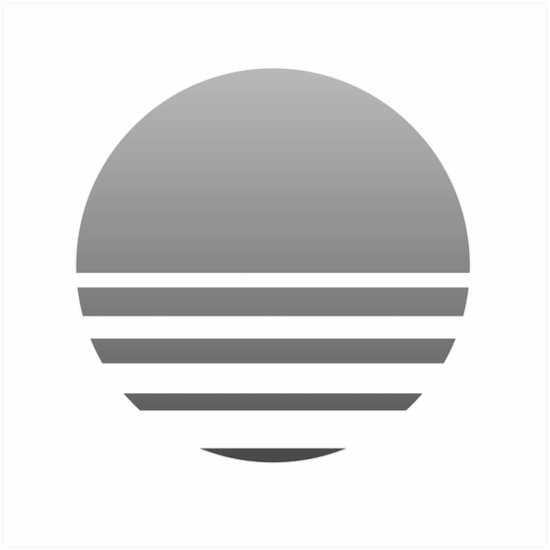

In [4]:
img.convert('LA')

이미지의 크기는 `Resize` 로 바꿀 수 있습니다.

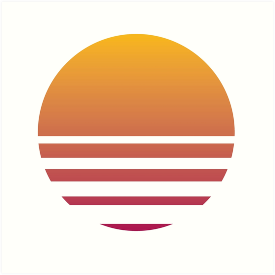

In [5]:
img.resize((img.size[0]//2,img.size[1]//2))

#### 1. Nearest Neighbor Interpolation
최근접 이웃 보간법은 말그대로 현재 위치에서 가장 가까운 픽셀의 값을 그대로 사용한다는 보간법입니다.  
그냥 가장 가까운 픽셀에서 불러오는 작업이기 때문에 연산량이 적다는 장점이 있습니다.  
하지만, 테두리와 같은 부분은 깨진다는 점이 있습니다.  
그럼 한번 해볼까요?

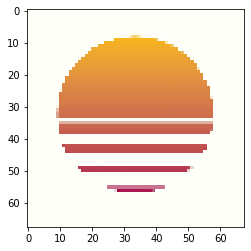

In [6]:
plt.imshow(img.resize((img.size[0]//8, img.size[1]//8), Image.NEAREST))

In [7]:
img.resize((img.size[0]//8, img.size[1]//8), Image.NEAREST).size

(68, 68)

다른 방식으로도 해볼게요.

#### 2.Linear Interpolation
Linear Interpolation은 그 픽셀과 다른 픽셀과의 거리비를 이용하여서 픽셀의 평균값을 구해냅니다.  
일반적인 Linear Interpolation은 그 이미지의 x축만 가지고 예측하는데 반해,  
Bilinear Interpolation은 x축과 y축 모두의 거리를 가지고 예측합니다.

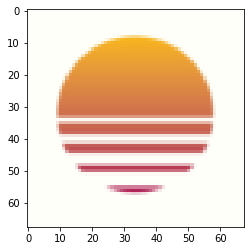

In [8]:
plt.imshow(img.resize((img.size[0]//8, img.size[1]//8), Image.BILINEAR))

#### 3.Bicubic Interpolation
Cubic Interpolation은 주변의 16개의 픽셀에서 거리에 따른 가중치를 제곱 및 세제곱 식을 통해서 이미지의 평균값을 구해냅니다.  
Bicubic은 그 이름에서도 알 수 있듯이 이 작업을 x축과 y축 모두에 적용시키는 방식입니다.  

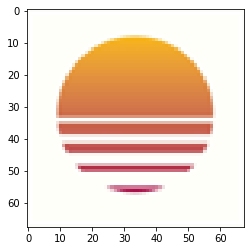

In [9]:
plt.imshow(img.resize((img.size[0]//8, img.size[1]//8), Image.BICUBIC))